### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=18,6
import os
from datetime import timedelta


In [2]:
# csv data files
raw_data = pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL.xlsx")
df_consumer  =pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL Jamia data.xlsx")
df_daily0 = pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL-prepaid_data_daily_log_grid (1).xlsx")
df_daily1 = pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL-prepaid_data_daily_log_grid.xlsx")


## high tention data(main meter)

In [ ]:

columns = ['creation_time', 'R_Voltage', 'Y_Voltage', 'B_Voltage', 'R_Current', 'Y_Current',
            'B_Current', 'A', 'BlockEnergy-WhExp', 'B', 'C', 'D', 'BlockEnergy-VAhExp',
            'KWh', 'BlockEnergy-VArhQ1', 'BlockEnergy-VArhQ4', 'BlockEnergy-VAhImp']

main_df = raw_data.iloc[:, 0].str.split(',', expand=True)
main_df.columns = columns  # Assign column names
df = main_df.drop([
    'BlockEnergy-WhExp', 'A', 'B', 'C', 'D', 'BlockEnergy-VAhExp', 'BlockEnergy-VAhExp', 'BlockEnergy-VArhQ1',
    'BlockEnergy-VArhQ4', 'BlockEnergy-VAhImp'], axis=1)
pd.set_option('display.max_columns', None)

df['creation_time'] = pd.to_datetime(df['creation_time'])
df['KWh'] = df['KWh'].astype(float)/1000
df['R_Voltage'] = df['R_Voltage'].astype(float)
df['Y_Voltage'] = df['Y_Voltage'].astype(float)
df['B_Voltage'] = df['B_Voltage'].astype(float)
df['R_Current'] = df['R_Current'].astype(float)
df['Y_Current'] = df['Y_Current'].astype(float)
df['B_Current'] = df['B_Current'].astype(float)
# print(df.tail())
df.set_index("creation_time",drop=True,inplace=True)
ht_df_daily = df[["KWh"]].resample(rule="1h").sum()
ht_df_daily.rename(columns={"KWh": "HT"}, inplace=True)
print(f"null values in ht_df_daily: {ht_df_daily.isna().sum()}")
ht_df_daily

null values in ht_df_daily: HT    0
dtype: int64


,HT
creation_time,
2022-12-12 00:00:00,33.3
2022-12-12 01:00:00,61.6
2022-12-12 02:00:00,54.9
2022-12-12 03:00:00,54.2
2022-12-12 04:00:00,52.8
...,...
2024-11-16 20:00:00,107.5
2024-11-16 21:00:00,106.2
2024-11-16 22:00:00,165.5


# consumer_data (multiple meter )


In [4]:
df_daily = pd.concat([df_daily0,df_daily1])
df_daily['log_date'] = pd.to_datetime(df_daily['log_date']).dt.floor('D')
df_daily.set_index("log_date",drop=True,inplace=True)
df_daily = df_daily.drop(index=pd.Timestamp("2024-11-19"))  # Use pd.Timestamp to ensure compatibility
df_daily['daily_consumption'] = round(df_daily.iloc[:,1:25].sum(axis=1),2)
df_daily

,location_id,grid_unit_00,grid_unit_01,grid_unit_02,grid_unit_03,grid_unit_04,grid_unit_05,grid_unit_06,grid_unit_07,grid_unit_08,grid_unit_09,grid_unit_10,grid_unit_11,grid_unit_12,grid_unit_13,grid_unit_14,grid_unit_15,grid_unit_16,grid_unit_17,grid_unit_18,grid_unit_19,grid_unit_20,grid_unit_21,grid_unit_22,grid_unit_23,unit_grid_opening,unit_grid_closing,daily_consumption
log_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01,100010010101,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3354.82,3359.0,4.18
2023-01-02,100010010101,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3359.00,3362.0,3.00
2023-01-03,100010010101,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3362.00,3364.0,2.00
2023-01-04,100010010101,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3364.00,3366.0,2.00
2023-01-05,100010010101,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3366.00,3370.0,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-14,100010020908,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4529.00,4533.0,4.00
2024-11-15,100010020908,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4533.00,4537.0,4.00
2024-11-16,100010020908,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4537.00,4539.0,2.00


In [5]:
data_lst = []
for datee in df_daily.index.unique():
    daily_consumption = round(sum(dict(df_daily.iloc[df_daily.index == datee ,1:25].sum()).values()),2)
    for k,d in dict(df_daily.iloc[df_daily.index == datee ,1:25].sum()).items():
    # data_lst.append((datee+timedelta(hours = int(k.split("_")[2])),round(d,2)))
        data_lst.append((datee+timedelta(hours = int(k.split("_")[2])),round(d,2),daily_consumption))

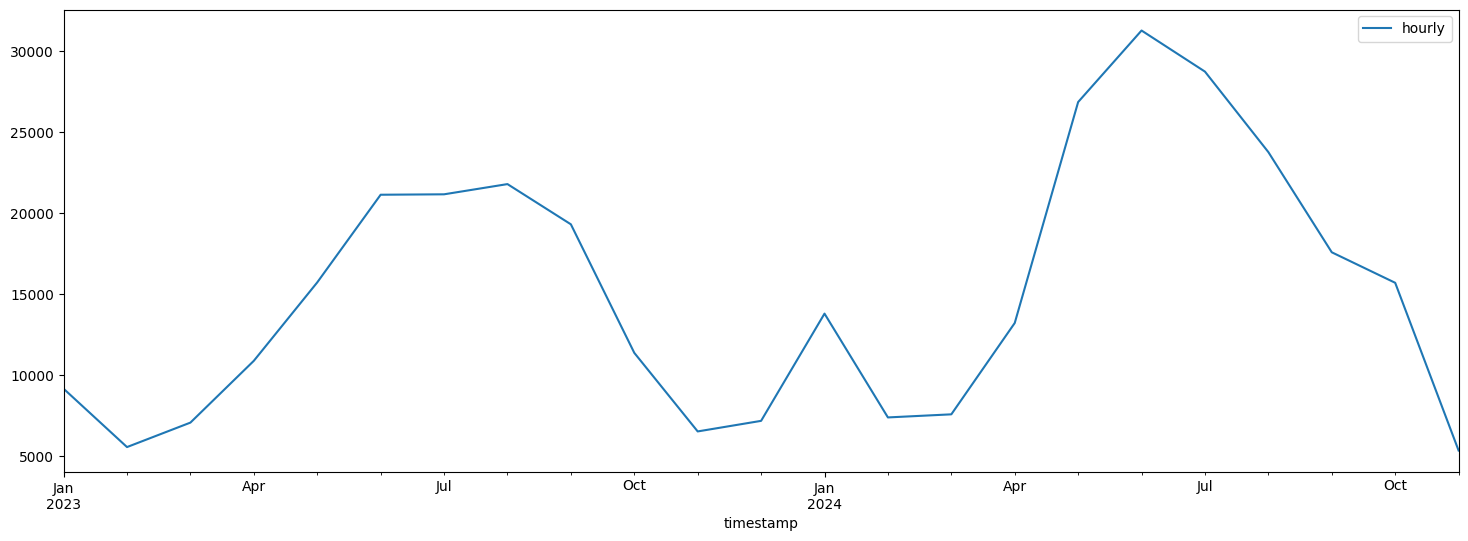

2023 1 9162.32
2023 2 5558.22
2023 3 7069.39
2023 4 10885.6
2023 5 15728.58
2023 6 21142.71
2023 7 21169.23
2023 8 21800.0
2023 9 19316.0
2023 10 11378.0
2023 11 6524.0
2023 12 7177.0
2024 1 13800.0
2024 2 7389.0
2024 3 7580.0
2024 4 13220.48
2024 5 26868.0
2024 6 31285.0
2024 7 28747.0
2024 8 23775.0
2024 9 17588.0
2024 10 15704.0
2024 11 5345.0


,hourly,daily,monthly
timestamp,,,
2023-01-01 00:00:00,2.28,204.22,9162.32
2023-01-01 01:00:00,2.47,204.22,9162.32
2023-01-01 02:00:00,0.47,204.22,9162.32
2023-01-01 03:00:00,3.21,204.22,9162.32
2023-01-01 04:00:00,0.55,204.22,9162.32
...,...,...,...
2024-11-18 19:00:00,11.00,237.00,5345.00
2024-11-18 20:00:00,9.00,237.00,5345.00
2024-11-18 21:00:00,9.00,237.00,5345.00


In [17]:
df = pd.DataFrame(data_lst,columns=['timestamp',"hourly","daily"])
df.set_index("timestamp",drop=True, inplace=True)
df_monthly = df[['hourly']].resample(rule="1ME").sum()
df_monthly.plot()
plt.show()  
for y in df.index.year.unique():
    for m in df_monthly.loc[df_monthly.index.year == y].index.month:
        # Get the monthly value
        monthly_value = df_monthly.loc[(df_monthly.index.year == y) & (df_monthly.index.month == m)].iloc[0, 0]
        print(y,m,monthly_value)
        df.loc[(df.index.year == y) & (df.index.month == m), 'monthly'] = monthly_value

# daily_data_aligned = df.align(df_monthly, axis=0)[0]  # Align indices
df


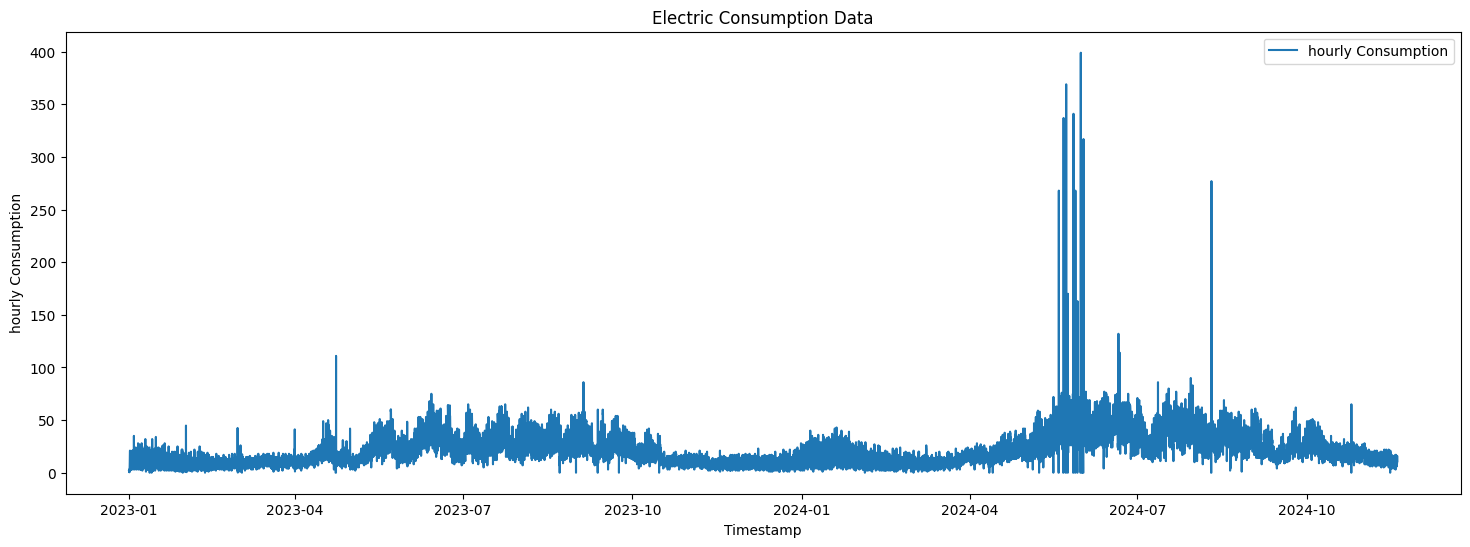

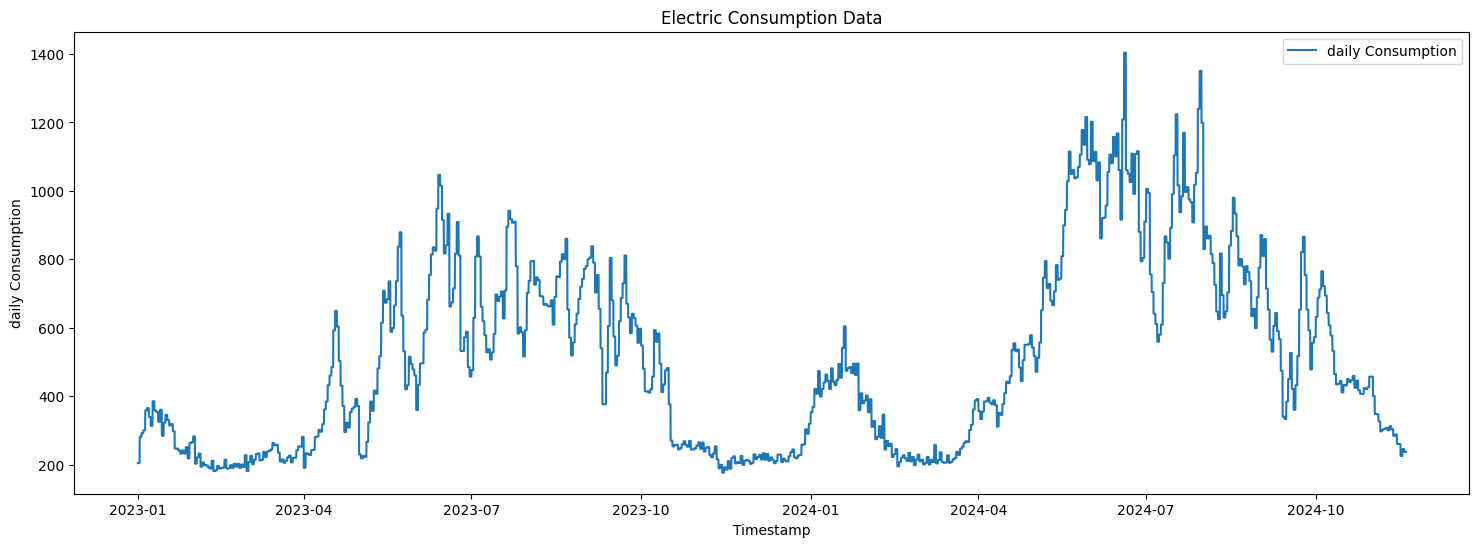

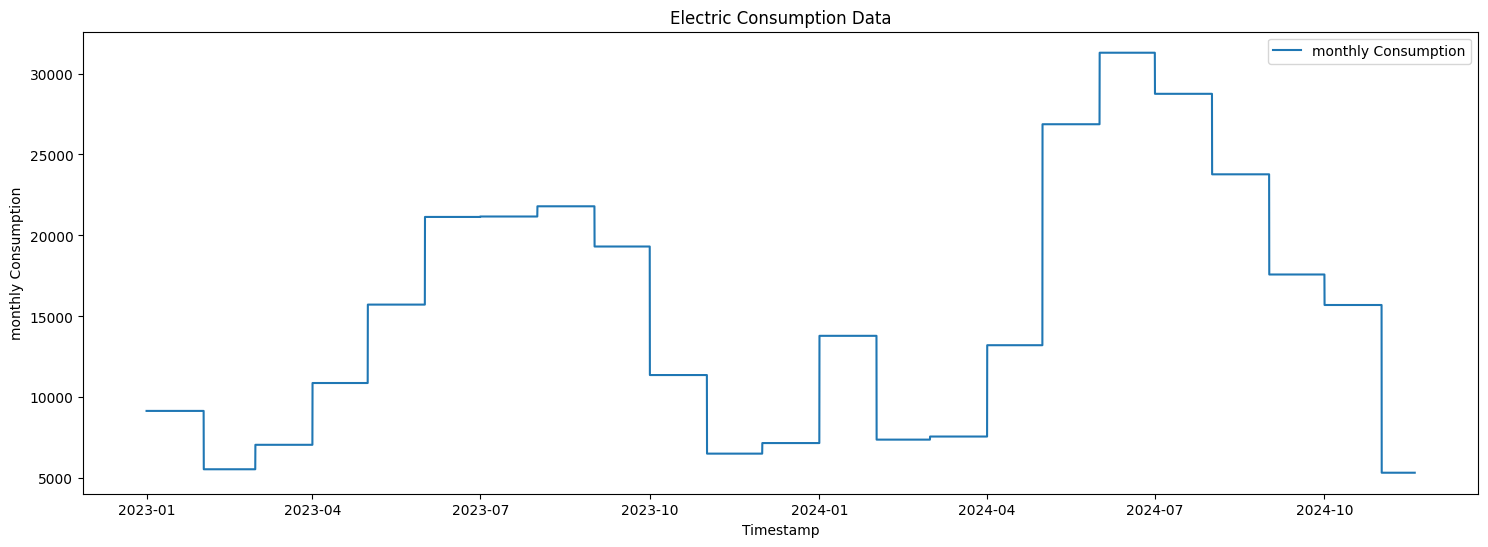

In [18]:
for col in df.columns:
    plt.plot(df.index, df[col], label=f'{col} Consumption')
    plt.legend()
    plt.title('Electric Consumption Data')
    plt.xlabel('Timestamp')
    plt.ylabel(f'{col} Consumption')
    plt.show()


In [19]:
df['hourly_to_daily_ratio'] = df['hourly'] / df['daily']
df['hourly_to_monthly_ratio'] = df['hourly'] / df['monthly']
df['daily_to_monthly_ratio'] = df['daily'] / df['monthly']
df

,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio
timestamp,,,,,,
2023-01-01 00:00:00,2.28,204.22,9162.32,0.011164,0.000249,0.022289
2023-01-01 01:00:00,2.47,204.22,9162.32,0.012095,0.000270,0.022289
2023-01-01 02:00:00,0.47,204.22,9162.32,0.002301,0.000051,0.022289
2023-01-01 03:00:00,3.21,204.22,9162.32,0.015718,0.000350,0.022289
2023-01-01 04:00:00,0.55,204.22,9162.32,0.002693,0.000060,0.022289
...,...,...,...,...,...,...
2024-11-18 19:00:00,11.00,237.00,5345.00,0.046414,0.002058,0.044341
2024-11-18 20:00:00,9.00,237.00,5345.00,0.037975,0.001684,0.044341
2024-11-18 21:00:00,9.00,237.00,5345.00,0.037975,0.001684,0.044341


In [20]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01, random_state=42)
df['isolation_forest'] = model.fit_predict(df[['hourly_to_daily_ratio', 'hourly_to_monthly_ratio','daily_to_monthly_ratio']])
df[df['isolation_forest'] == -1]


,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest
timestamp,,,,,,,
2023-01-01 02:00:00,0.47,204.22,9162.32,0.002301,0.000051,0.022289,-1
2023-01-01 04:00:00,0.55,204.22,9162.32,0.002693,0.000060,0.022289,-1
2023-01-03 15:00:00,35.00,292.00,9162.32,0.119863,0.003820,0.031870,-1
2023-01-09 20:00:00,32.00,385.00,9162.32,0.083117,0.003493,0.042020,-1
2023-01-13 13:00:00,32.00,360.00,9162.32,0.088889,0.003493,0.039291,-1
...,...,...,...,...,...,...,...
2024-11-14 07:00:00,22.00,260.00,5345.00,0.084615,0.004116,0.048644,-1
2024-11-15 02:00:00,0.00,260.00,5345.00,0.000000,0.000000,0.048644,-1
2024-11-15 03:00:00,0.00,260.00,5345.00,0.000000,0.000000,0.048644,-1


In [28]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=3)
df['dbscan_labels'] = model.fit_predict(df[['hourly']])
df[df['dbscan_labels'] == -1]


,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest,dbscan_labels
timestamp,,,,,,,,
2023-04-23 07:00:00,111.0,295.0,10885.6,0.376271,0.010197,0.027100,-1,-1
2023-09-04 12:00:00,86.0,838.0,19316.0,0.102625,0.004452,0.043384,-1,-1
2024-05-19 09:00:00,268.0,1028.0,26868.0,0.260700,0.009975,0.038261,-1,-1
2024-05-21 23:00:00,337.0,1050.0,26868.0,0.320952,0.012543,0.039080,-1,-1
2024-05-23 09:00:00,369.0,1037.0,26868.0,0.355834,0.013734,0.038596,-1,-1
2024-05-24 07:00:00,170.0,1040.0,26868.0,0.163462,0.006327,0.038708,-1,-1
2024-05-27 08:00:00,341.0,1178.0,26868.0,0.289474,0.012692,0.043844,-1,-1
2024-05-28 09:00:00,268.0,1135.0,26868.0,0.236123,0.009975,0.042244,-1,-1
2024-05-29 00:00:00,151.0,1216.0,26868.0,0.124178,0.005620,0.045258,-1,-1


In [22]:
df['dbscan_labels'].unique()

array([0], dtype=int64)

In [ ]:
# for i in df['dbscan_labels'].unique():
#     print(i,len(df[df['dbscan_labels']==i]))